<a href="https://colab.research.google.com/github/fabiorfc/Health-Data-Science/blob/master/Panorama_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estrutura do Notebook** (Construção em andamento)

1. Leitura e exploração da base
2. Tratamento e preparação dos dados
3. Cálculo das estatísticas descritivas
4. Comparação das cidades

# 1 - Leitura e exploração da base

## 1.1 - Libraries

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## 1.2 - Leitura dos dados

In [6]:
dados = pd.read_csv('HIST_PAINEL_COVIDBR_12out2020.csv', sep = ';')
dados.head(2)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9.0,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN


## 1.3 - Exploração dos dados

In [14]:
print(f' --- Hoje, dia {datetime.now().day}/{datetime.now().month}/{datetime.now().year}')
print(f' --- A tabela de dados do COVID possui:')
print(f' ------ {len(dados)} linhas')
print(f' ------ {dados.shape[1]} colunas')

 --- Hoje, dia 14/10/2020
 --- A tabela de dados do COVID possui:
 ------ 1120666 linhas
 ------ 17 colunas


In [30]:
pd.DataFrame({'Regioes verificadas na base' :dados['regiao'].unique()})

,Regioes verificadas na base
0,Brasil
1,Norte
2,Nordeste
3,Sudeste
4,Sul
5,Centro-Oeste


In [38]:
print(f'Estados verificados na base:')
dados['estado'].unique()

Estados verificados na base:


array([nan, 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

# 2 - Tratamento e preparação dos dados

## 2.1 - Revisão da literatura

In [68]:
# Conversao do campo de data
dados['data'] = pd.to_datetime(dados['data'])

# Cálculo das estatísticas epidemiológicas
dados['letalidade']  = dados['obitosAcumulado']/dados['casosAcumulado']
dados['prevalencia'] = dados['casosAcumulado']/pd.to_numeric(dados['populacaoTCU2019']) * 100000

# Separando os dados das cidades e estados de interesse
estado_SP = dados.query("estado == 'SP'")
assis     = dados.query("municipio == 'Assis'")
marilia   = dados.query("municipio == 'Marília'")
sao_paulo = dados.query("municipio == 'São Paulo'")

# Selecao das colunas que serão utilizadas
colunas_de_interesse = ['nomeRegiaoSaude','data','semanaEpi','populacaoTCU2019','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','letalidade','prevalencia']
estado_SP = estado_SP[colunas_de_interesse]
assis     = assis[colunas_de_interesse]
marilia   = marilia[colunas_de_interesse]
sao_paulo = sao_paulo[colunas_de_interesse]

estado_SP.reset_index(inplace = True)
assis.reset_index(inplace = True)
marilia.reset_index(inplace = True)
sao_paulo.reset_index(inplace = True)

# 2.2 - Comparação das Cidades

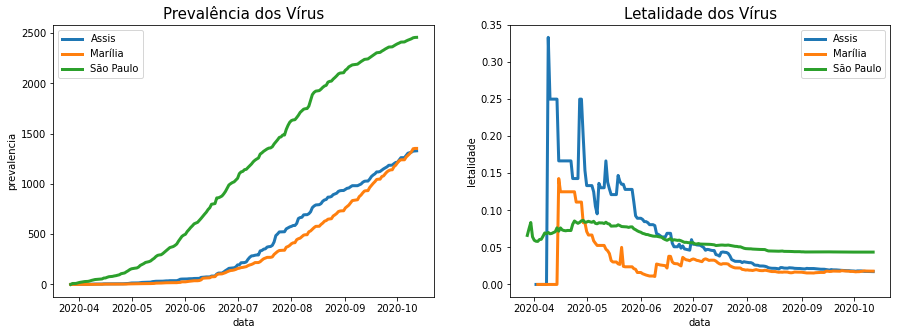

In [102]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))

sns.lineplot(data = assis    , y = 'prevalencia', x = 'data', label = 'Assis'    , linewidth = 3, ax = axs[0])
sns.lineplot(data = marilia  , y = 'prevalencia', x = 'data', label = 'Marília'  , linewidth = 3, ax = axs[0])
sns.lineplot(data = sao_paulo, y = 'prevalencia', x = 'data', label = 'São Paulo', linewidth = 3, ax = axs[0])

sns.lineplot(data = assis    , y = 'letalidade', x = 'data', label = 'Assis'    , linewidth = 3, ax = axs[1])
sns.lineplot(data = marilia  , y = 'letalidade', x = 'data', label = 'Marília'  , linewidth = 3, ax = axs[1])
sns.lineplot(data = sao_paulo, y = 'letalidade', x = 'data', label = 'São Paulo', linewidth = 3, ax = axs[1])

axs[0].set_title('Prevalência dos Vírus', fontsize = 15)
axs[1].set_title('Letalidade dos Vírus', fontsize = 15)
plt.show()